# INFERÊNCIA CAUSAL - SEMANA 5

## ANÁLISE DA BASE DE DADOS DO TITANIC

<img src="titanic (1).JPG">

### OBJETIVOS:
- Compreender e visualizar a base de dados do Titanic usando o R (desculpa kk);
- Identificar relações causais à luz dos princípios abordados nos últimos encontros do grupo;
- Compartilhar insights e diferentes formas para resolver os problemas encontrados

#### Inferência causal != Machine Learning
- Se no desafio original (ML) o objetivo é construir modelos para prever as chances de sobrevivência de um indivíduo, nosso objetivo será o de compreender como as diferentes variáveis estão relacionadas!

<img src="Sobrevivência.png" style="width: 400px;"/>

### Importação dos pacotes 

In [4]:
# ggplot2 -> Visualização de dados
library(ggplot2)

# dplyr -> Tratamento de dados
library(dplyr)

# tidyr -> Limpeza/tratamento de dados
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyr' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.10 is required


#### Pacote infer

In [6]:
# O brabo
library(infer)

Warning message:
"package 'infer' was built under R version 3.6.3"

### Importação do dataset

In [7]:
data <- read.csv('G:/FEA.dev/R/causal_inference/train.csv')

### Descrição do Dataset

In [8]:
head(data, 10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


#### Descrição das variáveis
- PassengerID : ID of the Passenger.
- Survived : No (0) Yes (1).
- Pclass : Passenger’s class.
- Name : Name of the Passenger.
- Sex : Gender of the Passenger.
- SibSp : Number of Siblings / Spouses aboard.
- Parch : Number of Parents / Children aboard.
- Ticket : Ticket number.
- Fare : Fare of the Ticket.
- Cabin : Cabin number.
- Embarked : Port of embarkation.

In [9]:
# Funções básicas de descrição dos dados
#glimpse(data)
summary(data)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [10]:
# Função para identificar NAs nas colunas
nas <- function(x){
  soma = 0
  for(i in 1:ncol(x)) {
    cat("Coluna",colnames(x[i]),"quantidade de NAs:",colSums(is.na(x[i])),"\n")
  }
}
nas(data)

Coluna PassengerId quantidade de NAs: 0 
Coluna Survived quantidade de NAs: 0 
Coluna Pclass quantidade de NAs: 0 
Coluna Name quantidade de NAs: 0 
Coluna Sex quantidade de NAs: 0 
Coluna Age quantidade de NAs: 177 
Coluna SibSp quantidade de NAs: 0 
Coluna Parch quantidade de NAs: 0 
Coluna Ticket quantidade de NAs: 0 
Coluna Fare quantidade de NAs: 0 
Coluna Cabin quantidade de NAs: 0 
Coluna Embarked quantidade de NAs: 0 


Alguns dados iniciais...

In [11]:
# Quantidade de homens e mulheres:
count(data, Sex)

Sex,n
female,314
male,577


In [12]:
# Quantidade de sobreviventes e mortos:
count(data, Survived)

Survived,n
0,549
1,342


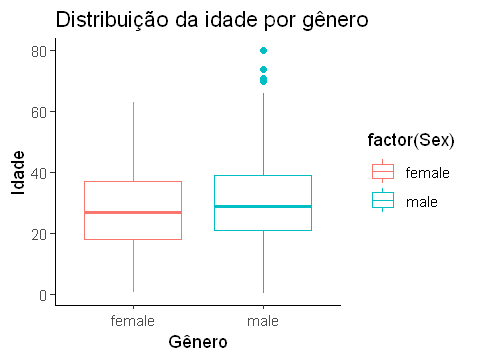

In [13]:
# Idade por gênero

# Customizando o tamanho do gráfico
options(repr.plot.width = 4, repr.plot.height = 3)

# O DataFrame data não é alterado!
data %>% 
    # O Pipe é um operador do pacote magrittr que permite ao usuário agregar uma sequência de operações dentro de variáveis  
    na.omit(Age) %>%
    # ggplot toma o dataset e especifíca as variáveis de cada eixo
    ggplot(aes(x = Sex, y = Age)) + 
      # geom_... identifica o "tipo de gráfico" que se pretende fazer, além de alguns outros atributos
      geom_boxplot(aes(color = factor(Sex))) + 
      theme_classic() +
      labs(x = "Gênero", y = "Idade", title = "Distribuição da idade por gênero") 

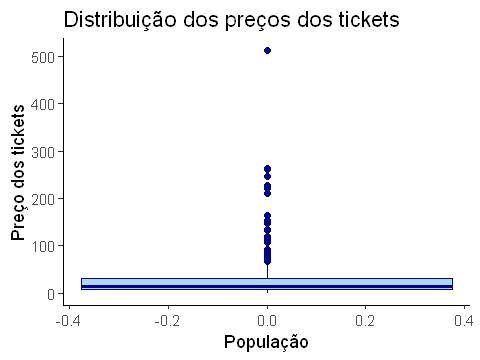

In [14]:
# Distribuição do Fare
options(repr.plot.width = 4, repr.plot.height = 3)

ggplot(data, aes(y=Fare)) + 
  geom_boxplot(col = 'darkblue', fill = 'lightblue') +
  theme_classic() +
  labs(x="População", y="Preço dos tickets", title="Distribuição dos preços dos tickets")

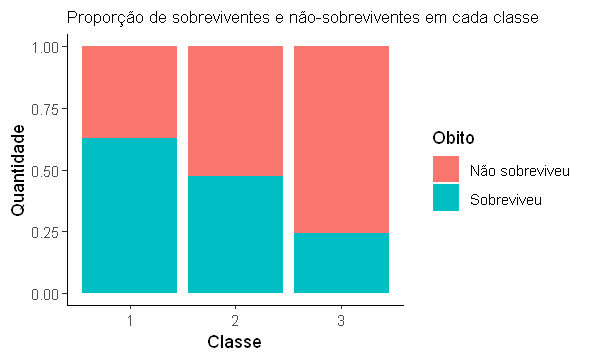

In [15]:
# Gráfico sobreviventes e não-sobreviventes em cada classe do navio:

options(repr.plot.width = 5, repr.plot.height = 3)

data %>%
    # Função mutate() permite criar variáveis a partir de outras variáveis dentro de um dataset
    mutate(Obito = ifelse(Survived == 0, 'Não sobreviveu', 'Sobreviveu')) %>%
    ggplot(aes(x = Pclass, fill = Obito)) + 
    theme_classic() +
    labs(title = 'Proporção de sobreviventes e não-sobreviventes em cada classe', x = 'Classe', y = 'Quantidade') +
    theme(plot.title = element_text(size = 10)) +
    geom_bar(position = 'fill') 

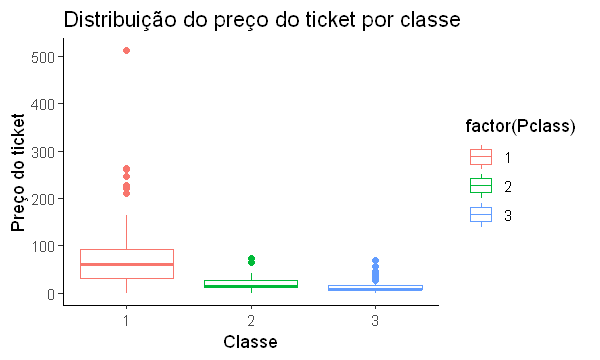

In [16]:
# Preço do ticket por classe
ggplot(data, aes(x=Pclass, y=Fare)) + 
  geom_boxplot(aes(col = factor(Pclass))) + 
  theme_classic() +
  labs(x = "Classe", y = "Preço do ticket", title = "Distribuição do preço do ticket por classe")

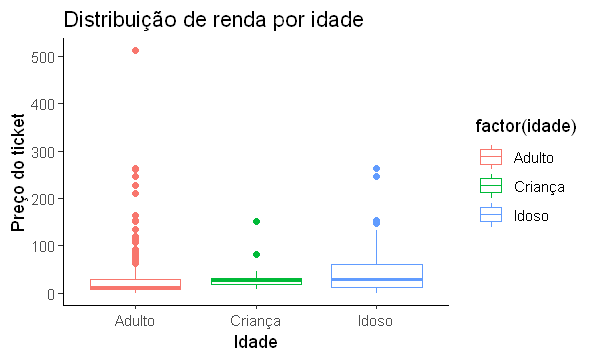

In [17]:
# Preço do ticket por idade
data %>%
    na.omit(Age) %>%
    # Função mutate() para criar diferentes classificações para as idades
    mutate(idade = ifelse(Age <= 10, 'Criança', ifelse(Age <= 45, 'Adulto', 'Idoso'))) %>%
    ggplot(aes(x=idade, y=Fare)) + 
    geom_boxplot(aes(col = factor(idade))) + 
    theme_classic() +
    labs(x="Idade", y="Preço do ticket", title="Distribuição de renda por idade")

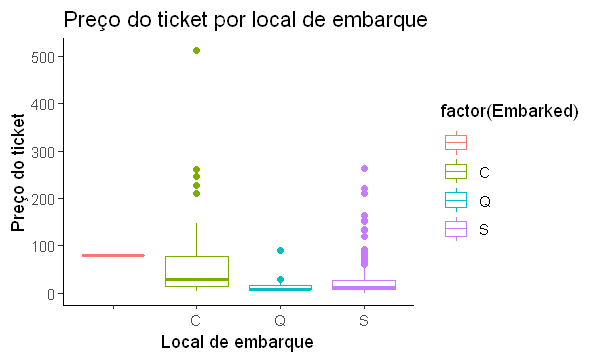

In [18]:
# Distribuição de Fare por Embarked:
ggplot(data, aes(x=Embarked, y=Fare)) + 
  geom_boxplot(aes(col = factor(Embarked))) + 
  theme_classic() +
  labs(x="Local de embarque", y="Preço do ticket", title="Preço do ticket por local de embarque")

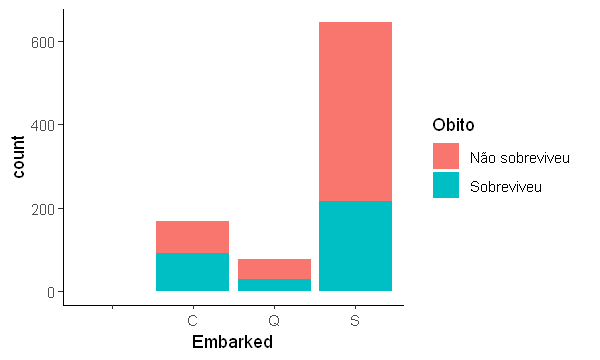

In [19]:
# Morte por local de embarque:
data %>%
    mutate(Obito = ifelse(Survived == 0, 'Não sobreviveu', 'Sobreviveu')) %>%
    ggplot(aes(x = Embarked)) + 
    theme_classic() +
    geom_bar(aes(fill = Obito))

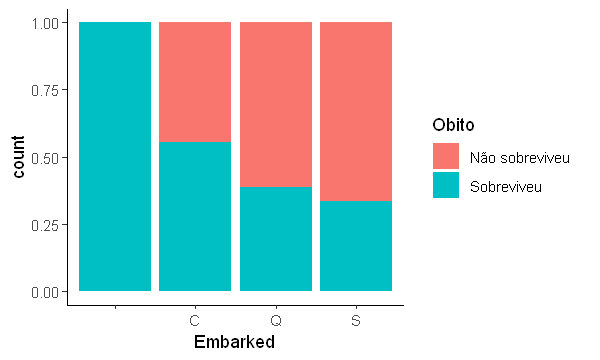

In [20]:
# Morte por local de embarque:
data %>%
    mutate(Obito = ifelse(Survived == 0, 'Não sobreviveu', 'Sobreviveu')) %>%
    ggplot(aes(x = Embarked, fill = Obito)) + 
    theme_classic() +
    geom_bar(position = 'fill')

Agora, bora pras análises:

### Pergunta 1: Homens morrem mais que mulheres? i.e. Survived ~ Gênero?

**H0**: Homens e mulheres têm a mesma chance de morrer -> **Sex e Survived são variáveis independentes!**

**HA**: Há diferenças significativas entre a taxa de homens e mulheres que morreram/sobreviveram, o que pode indicar uma relação causal entre as duas variáveis  -> **Homens tendem a não sobreviver mais do que mulheres**.



**Metodologia de resposta**:

    1) Calcular a diferença da proporção de sobreviventes entre os dois grupos;
    2) Permutar X novas distribuições em que as variáveis gênero e sobrevivência sejam independentes;
    3) Observar o intervalo de confiança produzido pela permutação e calcular o P-valor;
    4) Rejeitar ou não H0

In [21]:
# Total de mortos
count(data, Survived)

Survived,n
0,549
1,342


In [22]:
# Total de mortos por gênero:
data %>%
    count(Sex, Survived)

Sex,Survived,n
female,0,81
female,1,233
male,0,468
male,1,109


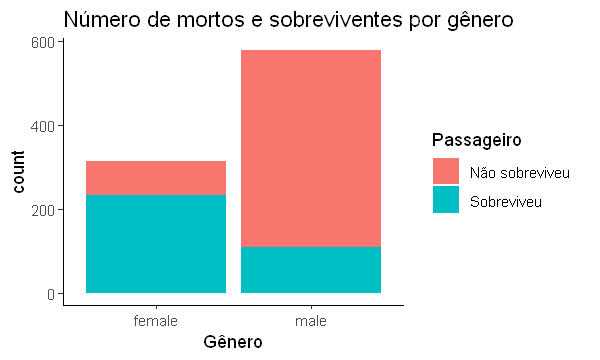

In [23]:
# Visualização da quantidade de homens e mulheres que morreram:
data %>%
  mutate(Passageiro = ifelse(Survived == 1, "Sobreviveu", "Não sobreviveu")) %>%
  ggplot(aes(x = Sex)) +
  theme_classic() +
  geom_bar(aes(fill = Passageiro)) +
  labs(x = 'Gênero', title = 'Número de mortos e sobreviventes por gênero')

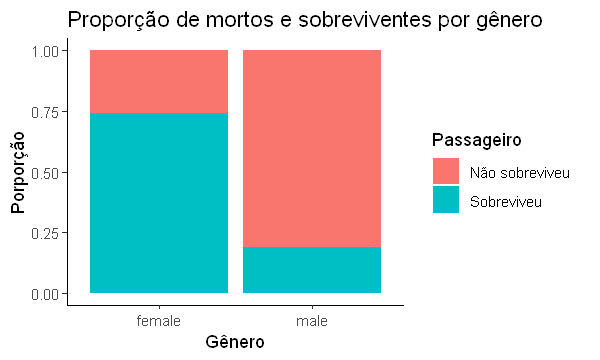

In [24]:
# Visualização da proporção de homens e mulheres que morreram:
data %>%
  mutate(Passageiro = ifelse(Survived == 1, "Sobreviveu", "Não sobreviveu")) %>%
  ggplot(aes(x = Sex, fill = Passageiro)) +
  theme_classic() +
  geom_bar(position = 'fill') +
  labs(y = 'Porporção', x = 'Gênero', title = 'Proporção de mortos e sobreviventes por gênero')

In [25]:
# Comparando a diferença percentual entre homens e mulheres que morreram:

diff_orig <- data %>%
  # Agrupa-se o dataset pela variável gênero
  group_by(Sex) %>%
  # Função summarize() para calcular 1) a média de mortos por gênero e 2) a diferença entre as médias
  summarize(dead_prop = mean(Survived == 0)) %>% 
  summarize(diff(dead_prop)) %>%
  pull()

cat('A diferença foi de', diff_orig, 'pontos, ou aproximadamente', paste(round(diff_orig * 100, 2), '%', sep = ''))

A diferença foi de 0.5531301 pontos, ou aproximadamente 55.31%

Sabendo da diferença de quase 55,4% entre a quantidade de homens e mulheres que não sobreviveram, a questão que se desenvolve é a seguinte: **seria possível observar tamanha diferença em um cenário em que os dois gêneros possuem a mesma probabilidade de sobreviver?**
- Para responder a questão, primeiro é necessário **permutar** (shuffle) **os dados** de modo a não haver **nenhuma relação entre gênero e sobrevivência.**
- O processo de permutação faz com que as duas variáveis não sejam relacionadas, possibilitando a **identificação da variabilidade natural das diferenças** nas taxas de promoção.
- Sabendo da variabilidade natural, é possível aferir o quão grande a diferença deveria ser para que identifiquemos algo incomum na amostra - hipótese alternativa.

In [27]:
data <- data %>%
  mutate(Passageiro = ifelse(Survived == 1, "Sobreviveu", "Não sobreviveu")) 
  
# Permutando os dados para criar distribuições em que as variáveis estudadas sejam independentes:
disc_perm <- data %>%
  specify(Passageiro ~ Sex, success = 'Sobreviveu') %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate(stat = 'diff in props', order = c('male', 'female'))

head(disc_perm, 10)

replicate,stat
1,0.037007804
2,0.007500911
3,-0.012170352
4,-0.012170352
5,-0.007252536
6,0.012418726
7,0.012418726
8,-0.056430692
9,0.007500911
10,-0.017088167


In [28]:
# Observando para os quantis de 5% e 95%
# Lembre-se, a REGIÃO CRÍTICA corresponde ao intervalo entre os quantis 5% e 95%
disc_perm %>% 
  summarize(
    q_05 = quantile(stat, p = .05),
    q_95 = quantile(stat, p = .95),
  )

q_05,q_95
-0.05643069,0.05667907


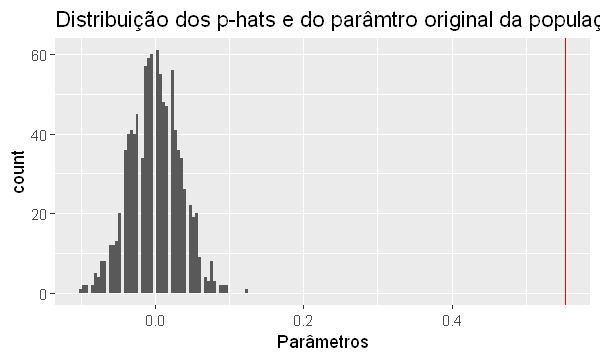

In [29]:
# Plotando a diferença entre a distribuição dos p-hats das amostras permutadas com a diferença da observação original: 
# Reminder: P-hat é a proporção da amostra; e P é a proporção da população. 

ggplot(disc_perm, aes(x = stat)) + 
  geom_histogram(binwidth = 0.004) +
  geom_vline(aes(xintercept = diff_orig), color = "red") +
  labs(x = 'Parâmetros', title = 'Distribuição dos p-hats e do parâmtro original da população')

### P-valor:
O P-valor é a **probabilidade de observar dados tão ou mais extremos que o que temos dado que a hipótese nula é verdadeira.**
- No caso da disferença entre os gêneros, o p-valor é a probabilidade de observar uma diferença maior ou igual a 0.5531 (diff_orig) quando as taxas de sobrevivência não variam de acordo com o gênero.
- Nesse caso, é a *proporção das diferenças permutadas que são menores ou iguais à diferença observada*
    - Normalmente, assume-se que um **P-valor menor ou igual a 0.05 pode indicar que os dados observados são inconsistentes com a hipótese nula** -> apenas uma a cada 20 "amostras nulas" apresentaria um parâmetro similar à diferença observada!

In [30]:
# Calculando o P-valor: 
disc_perm %>%
  get_p_value(diff_orig, direction = 'greater')

Warning message:
"Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information."

p_value
0


In [31]:
# Rodando uma regressão (faz sentido?):
summary(lm(Survived ~ factor(Sex), data))


Call:
lm(formula = Survived ~ factor(Sex), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7420 -0.1889 -0.1889  0.2580  0.8111 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.74204    0.02307   32.17   <2e-16 ***
factor(Sex)male -0.55313    0.02866  -19.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4087 on 889 degrees of freedom
Multiple R-squared:  0.2952,	Adjusted R-squared:  0.2944 
F-statistic: 372.4 on 1 and 889 DF,  p-value: < 2.2e-16


#### Conclusão:
- Homens morrem mais que mulheres :(

## Situação 2: Passageiros que pagaram mais têm maior chance de sobreviver? i.e. Survived ~ Fare?

**H0**: Os que pagaram mais e os que pagaram menos têm a mesma chance de sobreviver -> **Fare e Survived são variáveis independentes!**

**HA**: Há diferenças significativas entre a taxa de pessoas que pagaram mais ou menos que morreram/sobreviveram, o que pode indicar uma relação causal entre as duas variáveis  -> **Quem pagou mais no ticket tem maior chance de sobreviver**.

#### Usando o método do livro do Facure:
- Não faz muito sentido fazer inferências a partir da população
    - Por isso, vamos selecionar uma amostra aleatória de dados e tentar estimar a verdadeira proporção de sobreviventes teste da hipótese Survived ~ Fare.
- Método de resolução:
    - Calcular os parâmetros verdadeiros da população;
    - Tomar uma amostra aleatória de tamanho N;
    - Usar a Equação de Moivre para cada grupo;
    - Calcular os intervalos de confiança de 95% para cada estatística;
    - Encontrar o P-valor

In [32]:
# Dados - se Fare <= 3o quartil da distribuição: Proletário; else: Burguês safado
wealth <- data %>%
  mutate(wealth = ifelse(Fare <= quantile(Fare, p = .75), 'Not wealthy', 'Wealthy'))

head(wealth, 5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passageiro,wealth
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Não sobreviveu,Not wealthy
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Sobreviveu,Wealthy
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Sobreviveu,Not wealthy
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Sobreviveu,Wealthy
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Não sobreviveu,Not wealthy


In [33]:
# Primeiro, os parâmetros verdadeiros da POPULAÇÃO, que serão estimados nas próximas células:

# Fare médio dos que morreram
dead_true_mean <- mean(data$Fare[data$Survived == 0])

# Fare médio dos que sobreviveram
survivors_true_mean <- mean(data$Fare[data$Survived == 1])

# Diferença entre as médias
true_diff <- dead_true_mean - survivors_true_mean

cat('A média de Fare da população que morreu é de:', round(dead_true_mean, 2), '\n')
cat('A média de Fare da população que sobreviveu é de:', round(survivors_true_mean, 2), '\n')
cat('A diferença entre os dois grupos é de:', round(true_diff, 2))

A média de Fare da população que morreu é de: 22.12 
A média de Fare da população que sobreviveu é de: 48.4 
A diferença entre os dois grupos é de: -26.28

In [34]:
# Tomando uma amostra aleatória de 100 indivíduos:
wealth_sample <- sample_n(wealth, 100)
head(wealth_sample, 5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passageiro,wealth
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,,C,Sobreviveu,Not wealthy
819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.00,0,0,C 7075,6.4500,,S,Não sobreviveu,Not wealthy
425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,,S,Não sobreviveu,Not wealthy
390,1,2,"Lehmann, Miss. Bertha",female,17.00,0,0,SC 1748,12.0000,,C,Sobreviveu,Not wealthy
33,1,3,"Glynn, Miss. Mary Agatha",female,NA,0,0,335677,7.7500,,Q,Sobreviveu,Not wealthy


In [35]:
# Selecionando o Fare de sobreviventes e não-sobreviventes
dead_sample <- wealth_sample$Fare[wealth_sample$Survived == 0]
survivor_sample <- wealth_sample$Fare[wealth_sample$Survived == 1]

In [36]:
# Função erro padrão:
se <- function(x) {
    return(
    sd(x) / sqrt(length(x))
    )
} 

# Função do erro padrão do Fare de cada grupo
cat('SE de não-sobrevivente', se(dead_sample), '\n')
cat('SE de sobrevivente', se(survivor_sample))

SE de não-sobrevivente 2.267956 
SE de sobrevivente 8.57083

<img src="WhatsApp Image 2021-09-23 at 21.37.07.jpeg" style="width: 400px;"/>

In [44]:
# Função intervalo de confiança:
# [média da distribuição - (Z * erro padrão da distribuição); média da distribuição + (Z * erro padrão da distribuição)]

ci <- function(x){
    return(c(mean(x) - 1.96 * se(x), mean(x) + 1.96 * se(x)))
}

cat('Intervalo de confiança do Fare das vítimas:', ci(dead_sample), '\n') 
cat('Intervalo de confiança dos sobreviventes:', ci(survivor_sample)) 

Intervalo de confiança do Fare das vítimas: 15.12907 24.01946 
Intervalo de confiança dos sobreviventes: 27.83988 61.43753

In [45]:
# Agora, vamos construir um intervalo de confiança para a diferença entre as médias dos dois grupos

# diferença entre as médias dos grupos:
diff_mu <- mean(dead_sample) - mean(survivor_sample)

# diferença entre os ERROS PADRÕES dos grupos:
diff_se <- sqrt(var(survivor_sample)/length(survivor_sample) + var(dead_sample)/length(dead_sample))

# construindo o intervalo de confiança de 95%:
ci_2 <- c(diff_mu - 1.96 * diff_se, diff_mu + 1.96 * diff_se)

cat('É possível afirmar com 95% de certeza que existe uma diferença entre o Fare dos indivíduos que morreram e que não morreram que esta no intervalo de: \n', ci_2)

É possível afirmar com 95% de certeza que existe uma diferença entre o Fare dos indivíduos que morreram e que não morreram que esta no intervalo de: 
 -42.44145 -7.687441

In [46]:
# Estatística Z = diferença entre as médias / diferença entre os erros padrões 
z <- diff_mu / diff_se
print(z)

[1] -2.827087


In [47]:
# Encontrando o P-valor:
pnorm(z)

[1] 0.002348675

### Agora, usando o pacote infer

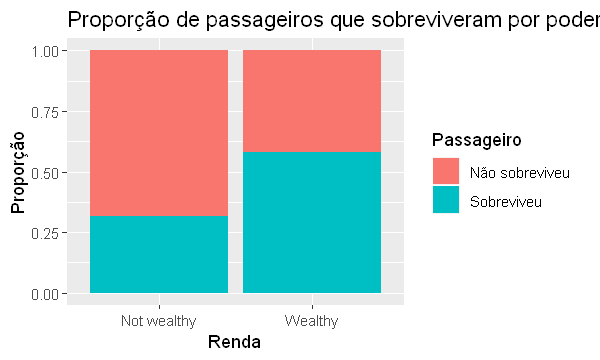

In [48]:
# Visualização da proporção de ricos e ~não ricos~ que morreram/sobreviveram
wealth %>%
  ggplot(aes(x = wealth, fill = Passageiro)) + 
  geom_bar(position = 'fill') +
  labs(y = 'Proporção', x = 'Renda', title = 'Proporção de passageiros que sobreviveram por poder aquisitivo')

In [49]:
# Comparando a diferença percentual entre ricos e ~não ricos~ que morreram:
diff_wealth <- wealth %>%
  group_by(wealth) %>%
  summarize(dead_prop = mean(Survived == 0)) %>% 
  summarize(diff(dead_prop)) %>%
  pull()
cat('A diferença foi de', diff_wealth, 'pontos, ou aproximadamente', paste(round(diff_wealth * 100, 2), '%', sep = ''))

A diferença foi de -0.2626954 pontos, ou aproximadamente -26.27%

In [50]:
# disc_perm corresponde ao conjunto de dados repetidos cuja variável promote foi permutada de 
# modo a não existir nenhuma correlação entre as variáveis!
disc_perm_wealth <- wealth %>%
  specify(Passageiro ~ wealth, success = 'Sobreviveu') %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate(stat = 'diff in props', order = c('Not wealthy', 'Wealthy'))
head(disc_perm_wealth, 10)

replicate,stat
1,-0.058720155
2,-0.022724518
3,-0.022724518
4,-0.010725973
5,-0.040722337
6,0.019270391
7,0.007271846
8,0.031268937
9,-0.070718701
10,0.019270391


Warning message:
"Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information."

p_value
0


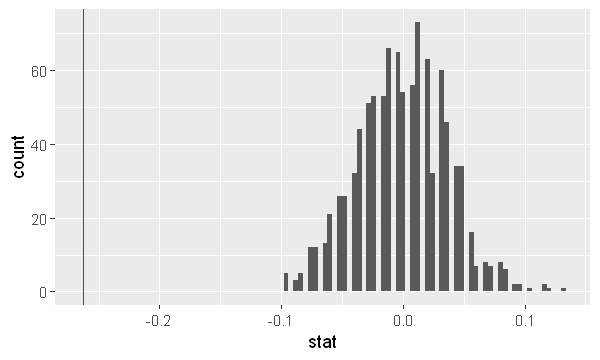

In [51]:
# Calculando o P-valor
disc_perm %>%
  get_p_value(diff_orig, direction = 'greater')

ggplot(disc_perm_wealth, aes(x = stat)) + 
  geom_histogram(binwidth = 0.004) +
  geom_vline(aes(xintercept = diff_wealth), color = "red")

In [52]:
# Regressão 1: Survived ~ Fare:
summary(lm(Survived ~ Fare, wealth))


Call:
lm(formula = Survived ~ Fare, data = wealth)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9653 -0.3391 -0.3222  0.6044  0.6973 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3026994  0.0187849  16.114  < 2e-16 ***
Fare        0.0025195  0.0003174   7.939 6.12e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4705 on 889 degrees of freedom
Multiple R-squared:  0.06621,	Adjusted R-squared:  0.06516 
F-statistic: 63.03 on 1 and 889 DF,  p-value: 6.12e-15


In [53]:
# Regressão 2: Survived ~ Classe:
summary(lm(Survived ~ wealth, wealth))


Call:
lm(formula = Survived ~ wealth, data = wealth)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5811 -0.3184 -0.3184  0.4189  0.6816 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.31839    0.01830  17.396  < 2e-16 ***
wealthWealthy  0.26270    0.03667   7.164 1.64e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4734 on 889 degrees of freedom
Multiple R-squared:  0.05459,	Adjusted R-squared:  0.05352 
F-statistic: 51.33 on 1 and 889 DF,  p-value: 1.639e-12


#### Conclusão:
- As variáveis Fare e Survived estão correlacionadas

# Situação 3: Pronome de tratamento influencia na sobrevivência?

In [54]:
# Dados
social <- wealth %>% 
  mutate(title = gsub("(.*, )|(\\..*)","", Name))

# Títulos
table(social$Sex, social$title)

        
         Capt Col Don  Dr Jonkheer Lady Major Master Miss Mlle Mme  Mr Mrs  Ms
  female    0   0   0   1        0    1     0      0  182    2   1   0 125   1
  male      1   2   1   6        1    0     2     40    0    0   0 517   0   0
        
         Rev Sir the Countess
  female   0   0            1
  male     6   1            0

In [55]:
social <- social %>%
    mutate(classificacao_title = ifelse(title == 'Mr'| title == 'Mrs'| title == 'Miss', 'Common', 'Rare'))

social %>%
  count(Sex, classificacao_title)

Sex,classificacao_title,n
female,Common,307
female,Rare,7
male,Common,517
male,Rare,60


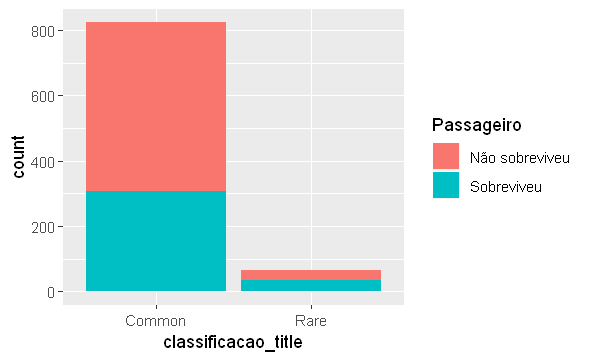

In [56]:
# Contagem de mortos por classificação:
social %>%
  ggplot(aes(x = classificacao_title)) +
  geom_bar(aes(fill = Passageiro))

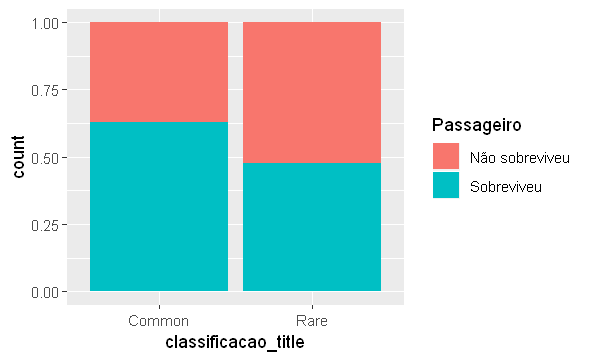

In [57]:
# Visualização da proporção de pessoas que morreram por classificação:
social %>%
  mutate(Passageiro = ifelse(Survived == 0, "Sobreviveu", "Não sobreviveu")) %>%
  ggplot(aes(x = classificacao_title, fill = Passageiro)) + 
  geom_bar(position = 'fill')

In [58]:
# Diferença percentual entre os dois grupos:
diff_social <- social %>%
  group_by(classificacao_title) %>%
  summarize(dead_prop = mean(Survived == 0)) %>% 
  summarize(diff(dead_prop)) %>%
  pull()
diff_social

[1] -0.1498152

In [59]:
disc_perm_social <- social %>%
  specify(Passageiro ~ classificacao_title, success = 'Sobreviveu') %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate(stat = 'diff in props', order = c('Common', 'Rare'))
head(disc_perm_social)

replicate,stat
1,0.059991306
2,-0.004564556
3,-0.069120417
4,0.076130271
5,-0.020703521
6,0.043852340


In [60]:
disc_perm_social %>% 
  summarize(
    q_05 = quantile(stat, p = .05),
    q_95 = quantile(stat, p = .95),
  )

q_05,q_95
-0.1013983,0.09226924


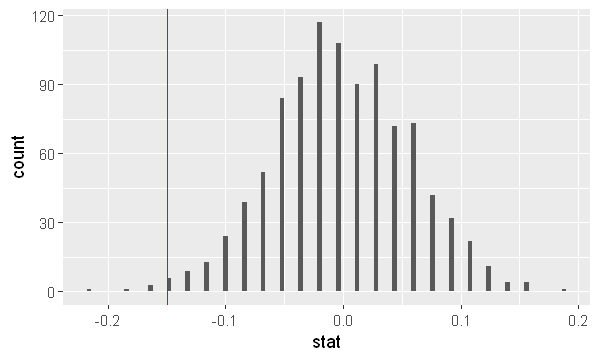

In [61]:
# Plotando a diferença entre a distribuição dos p-hats das amostras permutadas com a diferença da observação original: 
ggplot(disc_perm_social, aes(x = stat)) + 
  geom_histogram(binwidth = 0.004) +
  geom_vline(aes(xintercept = diff_social), color = "red")

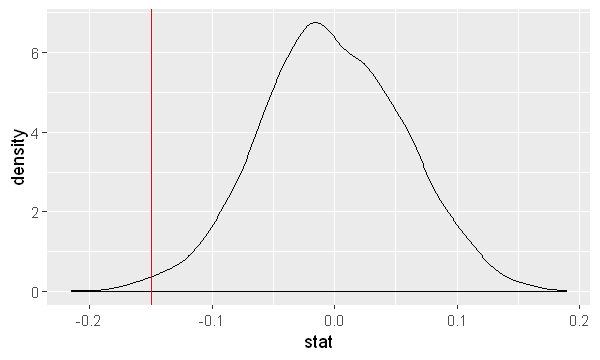

In [62]:
ggplot(disc_perm_social, aes(x = stat)) + 
  geom_density() +
  geom_vline(aes(xintercept = diff_social), color = "red")

Warning message:
"`visualize()` should no longer be used to plot a p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead."

p_value
0.005


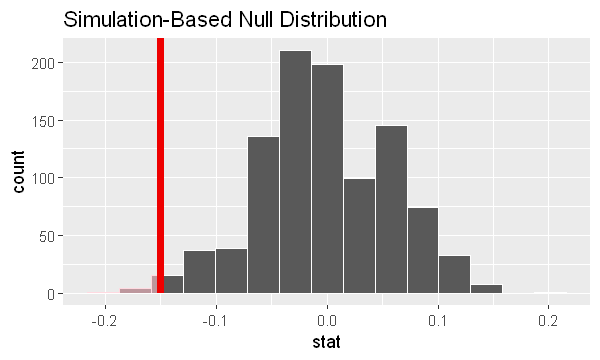

In [63]:
disc_perm_social %>%
  visualize(obs_stat = diff_social, direction = "less")

disc_perm_social %>%
  get_p_value(diff_social, direction = 'less')

In [64]:
# Regressãozinha:
summary(lm(Survived ~ factor(classificacao_title), social))


Call:
lm(formula = Survived ~ factor(classificacao_title), data = social)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5224 -0.3726 -0.3726  0.6274  0.6274 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.37257    0.01690   22.04   <2e-16 ***
factor(classificacao_title)Rare  0.14982    0.06165    2.43   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4853 on 889 degrees of freedom
Multiple R-squared:  0.0066,	Adjusted R-squared:  0.005482 
F-statistic: 5.906 on 1 and 889 DF,  p-value: 0.01529


## Regressões:

In [65]:
# Regressao 1 -> Survived ~ Gênero
summary(lm(Survived ~ Sex, data))


Call:
lm(formula = Survived ~ Sex, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7420 -0.1889 -0.1889  0.2580  0.8111 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.74204    0.02307   32.17   <2e-16 ***
Sexmale     -0.55313    0.02866  -19.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4087 on 889 degrees of freedom
Multiple R-squared:  0.2952,	Adjusted R-squared:  0.2944 
F-statistic: 372.4 on 1 and 889 DF,  p-value: < 2.2e-16


In [66]:
# Regressão 2 -> Survived ~ Age
summary(lm(Survived ~ Age, data))


Call:
lm(formula = Survived ~ Age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4811 -0.4158 -0.3662  0.5789  0.7252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.483753   0.041788  11.576   <2e-16 ***
Age         -0.002613   0.001264  -2.067   0.0391 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4903 on 712 degrees of freedom
  (177 observations deleted due to missingness)
Multiple R-squared:  0.005963,	Adjusted R-squared:  0.004567 
F-statistic: 4.271 on 1 and 712 DF,  p-value: 0.03912


In [67]:
# Regressão 3 -> Survived ~ Fare
summary(lm(Survived ~ Fare, data))


Call:
lm(formula = Survived ~ Fare, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9653 -0.3391 -0.3222  0.6044  0.6973 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3026994  0.0187849  16.114  < 2e-16 ***
Fare        0.0025195  0.0003174   7.939 6.12e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4705 on 889 degrees of freedom
Multiple R-squared:  0.06621,	Adjusted R-squared:  0.06516 
F-statistic: 63.03 on 1 and 889 DF,  p-value: 6.12e-15


In [68]:
# Regressão 4 -> Survived ~ Pclass
summary(lm(Survived ~ factor(Pclass), data))


Call:
lm(formula = Survived ~ factor(Pclass), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6296 -0.2424 -0.2424  0.3704  0.7576 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.62963    0.03117  20.198  < 2e-16 ***
factor(Pclass)2 -0.15680    0.04596  -3.412 0.000675 ***
factor(Pclass)3 -0.38727    0.03741 -10.353  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4582 on 888 degrees of freedom
Multiple R-squared:  0.1155,	Adjusted R-squared:  0.1135 
F-statistic: 57.96 on 2 and 888 DF,  p-value: < 2.2e-16


In [69]:
# Regressão 5 -> Survived ~ Título
summary(lm(Survived ~ classificacao_title, social))


Call:
lm(formula = Survived ~ classificacao_title, data = social)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5224 -0.3726 -0.3726  0.6274  0.6274 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.37257    0.01690   22.04   <2e-16 ***
classificacao_titleRare  0.14982    0.06165    2.43   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4853 on 889 degrees of freedom
Multiple R-squared:  0.0066,	Adjusted R-squared:  0.005482 
F-statistic: 5.906 on 1 and 889 DF,  p-value: 0.01529


In [70]:
# Regressão 6 -> Fare ~ Age
summary(lm(Fare ~ Age, data))


Call:
lm(formula = Fare ~ Age, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-42.42 -24.49 -17.60   2.33 475.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.3009     4.4922   5.410 8.64e-08 ***
Age           0.3500     0.1359   2.575   0.0102 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.71 on 712 degrees of freedom
  (177 observations deleted due to missingness)
Multiple R-squared:  0.009229,	Adjusted R-squared:  0.007837 
F-statistic: 6.632 on 1 and 712 DF,  p-value: 0.01022


In [72]:
# Regressão 7: Idade ~ gênero 
summary(lm(Age ~ Sex, data))


Call:
lm(formula = Age ~ Sex, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.307  -9.727  -1.727   8.273  49.273 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.9157     0.8959  31.160   <2e-16 ***
Sexmale       2.8109     1.1247   2.499   0.0127 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.47 on 712 degrees of freedom
  (177 observations deleted due to missingness)
Multiple R-squared:  0.008696,	Adjusted R-squared:  0.007304 
F-statistic: 6.246 on 1 and 712 DF,  p-value: 0.01267


In [77]:
# Título ~ Fare
social %>%
    na.omit(classificacao_title) %>%
    na.omit(Fare) %>%
    summary(lm(classificacao_title ~ Fare))

ERROR: Error in eval(predvars, data, env): objeto 'classificacao_title' não encontrado


In [85]:
# Vários controles:
summary(lm(Survived ~ Fare + Age + factor(Sex) + factor(Pclass), social))


Call:
lm(formula = Survived ~ Fare + Age + factor(Sex) + factor(Pclass), 
    data = social)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11662 -0.25088 -0.06428  0.23120  1.00635 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.118e+00  6.372e-02  17.550  < 2e-16 ***
Fare             6.052e-05  3.480e-04   0.174    0.862    
Age             -5.433e-03  1.096e-03  -4.958 8.92e-07 ***
factor(Sex)male -4.788e-01  3.095e-02 -15.471  < 2e-16 ***
factor(Pclass)2 -2.035e-01  4.830e-02  -4.213 2.84e-05 ***
factor(Pclass)3 -4.018e-01  4.714e-02  -8.525  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3851 on 708 degrees of freedom
  (177 observations deleted due to missingness)
Multiple R-squared:  0.3902,	Adjusted R-squared:  0.3859 
F-statistic: 90.61 on 5 and 708 DF,  p-value: < 2.2e-16


### Extra: Bootstrapping

Vamos estimar quantas pessoas morreram a partir da reamostragem de uma amostra da população:

<img src="ch4_2_v4.018.png" style="width: 600px;"/>

In [86]:
# Proporção verdadeira de mortos da população:
round(mean(data$Survived), 3)

[1] 0.384

In [87]:
# Tomando uma amostra de tamanho 400 do dataset
bootstrap_sample <- sample_n(data, 400)

In [88]:
bootstrap_sample %>%
    count(Passageiro)

Passageiro,n
Não sobreviveu,262
Sobreviveu,138


In [89]:
# Fazendo o bootstrapping e extraindo o p-hat* das reamostragens: 
bootstrap_sample_props <- bootstrap_sample %>%
  specify(response = Passageiro, success = 'Sobreviveu') %>%
# Note que o valor de reps é igual ao valor de observações da amostra selecionada! 
  generate(reps = 400, type = 'bootstrap') %>% 
  calculate(stat = 'prop')

head(bootstrap_sample_props)

replicate,stat
1,0.3150
2,0.3725
3,0.3875
4,0.3700
5,0.3500
6,0.2950


In [90]:
# Calculando a variabilidade da estatística das ***amostras do bootstrap*** -> ERRO PADRÃO:
bootstrap_sample_props %>% 
  summarize(variability = sd(stat))

variability
0.02355192


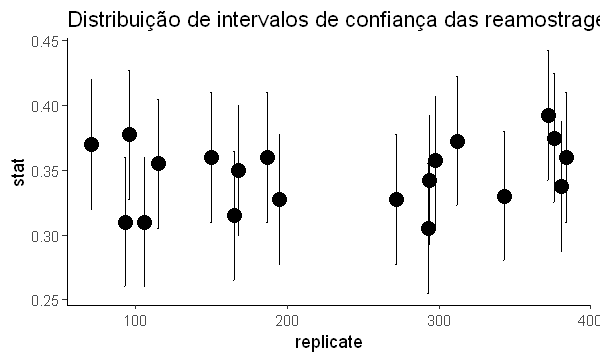

In [91]:
# Plotando os intervalos de confiança para cada reamostragem:
sample_n(bootstrap_sample_props, 20) %>%
    mutate(CI_s = stat + 1.96 * sd(stat)) %>%
    mutate(CI_i = stat - 1.96 * sd(stat)) %>%
    ggplot(aes(x = replicate, y = stat)) +
        geom_point(size = 4) +
        geom_errorbar(aes(ymax = CI_s, ymin = CI_i)) +
        theme_classic() +
        labs(title = 'Distribuição de intervalos de confiança das reamostragens')

In [92]:
# Calculando o p-hat da ***amostra original***:
p_hat <- bootstrap_sample %>%
  summarize(stat = mean(Passageiro == 'Sobreviveu')) %>%
  pull()

p_hat

[1] 0.345

In [93]:
# Pela Regra Empírica (intervalo t) - aprox. 95% das reamostragens vão produzir p-hat* dentro de um intervalo de 2
# erros padrão do p-hat da amostra original:
bootstrap_sample_props %>%
  summarize(
    lower = p_hat - 1.96 * sd(stat),
    upper = p_hat + 1.96 * sd(stat)
  )

lower,upper
0.2988382,0.3911618


In [94]:
# Pelo cálculo dentro do quantil estabelecido:
percentile_ci <- bootstrap_sample_props %>% 
  get_confidence_interval(level = 0.95)

percentile_ci

lower_ci,upper_ci
0.2999375,0.385


Warning message:
"`visualize()` should no longer be used to plot a confidence interval. Arguments `endpoints`, `endpoints_color`, and `ci_fill` are deprecated. Use `shade_confidence_interval()` instead."

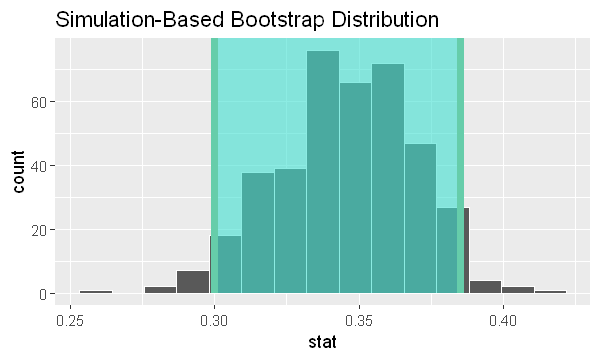

In [95]:
bootstrap_sample_props %>% 
  visualize(endpoints = percentile_ci, direction = 'between')